# Snippet search ML experiments

This document is related to experiments around code graph, where each line correspond to one node. 
An egde weight equal to number of simple identifiers that share between two lines. 

## Cut method 

Here one can find the small presentation with method scheme description. 

https://docs.google.com/presentation/d/1-jr0IqraXAI0WPEpb_dVdE_sTnOXQmuoJyeb8OgW4Zg/edit

Lets reproduse plot for this method

**TODO:** Add algo description

In [1]:
from ids2graph.line_ids2graph import get_cuts, get_ids,cuts2snippets
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
filename = "./examples/example.py"
with open(filename, 'r') as f:
    codelines = ["{:2}  ".format(i) + x.strip("\n") for i, x in enumerate(f.readlines())]
ids = get_ids(filename)

lines_num = max([max(lines) for lines in ids.values()])
cut = get_cuts(ids, lines_num=lines_num)
res = cuts2snippets(cut)
snippets = cuts2snippets(cut)
print(snippets)

[[1, 4], [5, 9], [10, 25], [26, 34], [35, 49], [50, 54]]


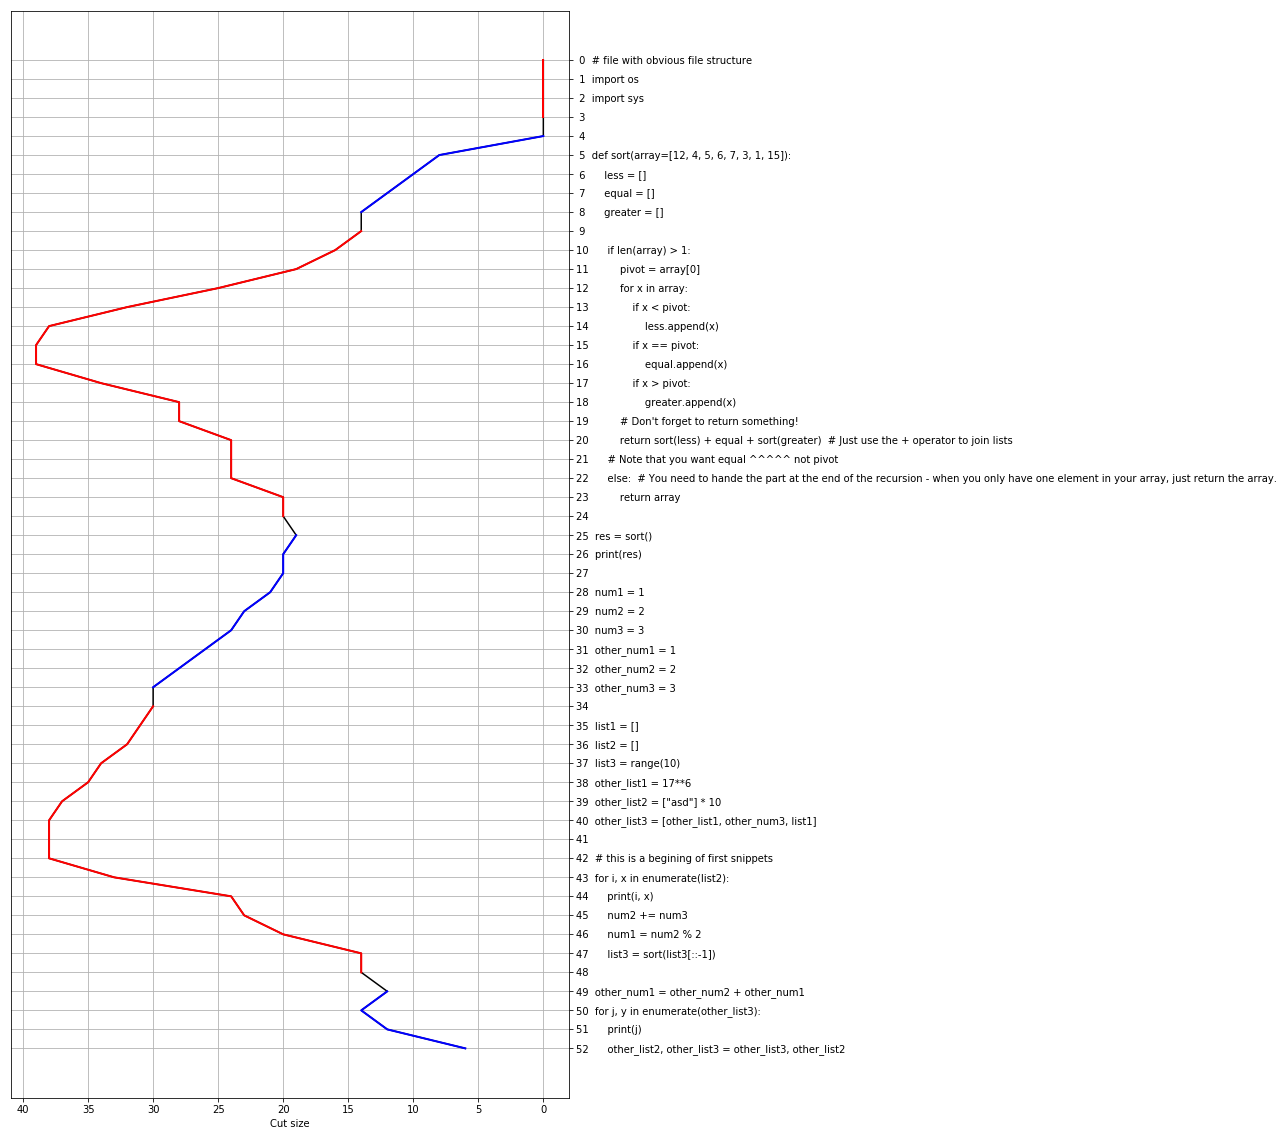

In [3]:
f = plt.figure(figsize=(10,20))
ax = f.add_subplot(111)
ax.yaxis.tick_right()
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
ax.yaxis.set_label_position("right")
plt.yticks(range(len(cut)), codelines)
plt.xlabel("Cut size")
plt.grid()
#plt.hold("on")
col = ['r', 'b']
plt.plot(cut, range(len(cut)), 'k')
for indx, sn in enumerate(snippets):
    plt.plot(cut[sn[0]-1:sn[1]], range(sn[0]-1, min(sn[1], len(cut))), c=col[indx%len(col)], linewidth=2)
pass

It also rely on spases. Sometimes it leads to additional breaks (8-9, 33-34).
Easy thing to fix

## Lets build the graph!

`ids` is bidirectional graph if you think carefully 

In [4]:
ids

{'append': [15, 17, 19],
 'array': [6, 12, 13, 24, 11],
 'enumerate': [44, 51],
 'equal': [8, 17, 21],
 'greater': [9, 19, 21],
 'i': [45, 44],
 'j': [52, 54, 51],
 'len': [11],
 'less': [7, 15, 21],
 'list1': [36, 41],
 'list2': [37, 44],
 'list3': [38, 48, 48],
 'num1': [29, 47],
 'num2': [30, 46, 47],
 'num3': [31, 46],
 'other_list1': [39, 41],
 'other_list2': [40, 53, 53],
 'other_list3': [41, 53, 53, 51],
 'other_num1': [32, 50, 50],
 'other_num2': [33, 50, 54],
 'other_num3': [34, 41, 54],
 'pivot': [12, 14, 16, 18],
 'print': [27, 45, 52],
 'range': [38],
 'res': [26, 27],
 'sort': [6, 21, 21, 26, 48],
 'x': [15, 14, 17, 16, 19, 18, 13, 45, 44],
 'y': [51]}

In [5]:
import networkx as nx
B = nx.Graph()
tokens = ids.keys()
B.add_nodes_from(tokens, bipartite=0)
B.add_nodes_from(range(lines_num), bipartite=1)
B.add_edges_from([(k, v) for k in ids for v in ids[k]])

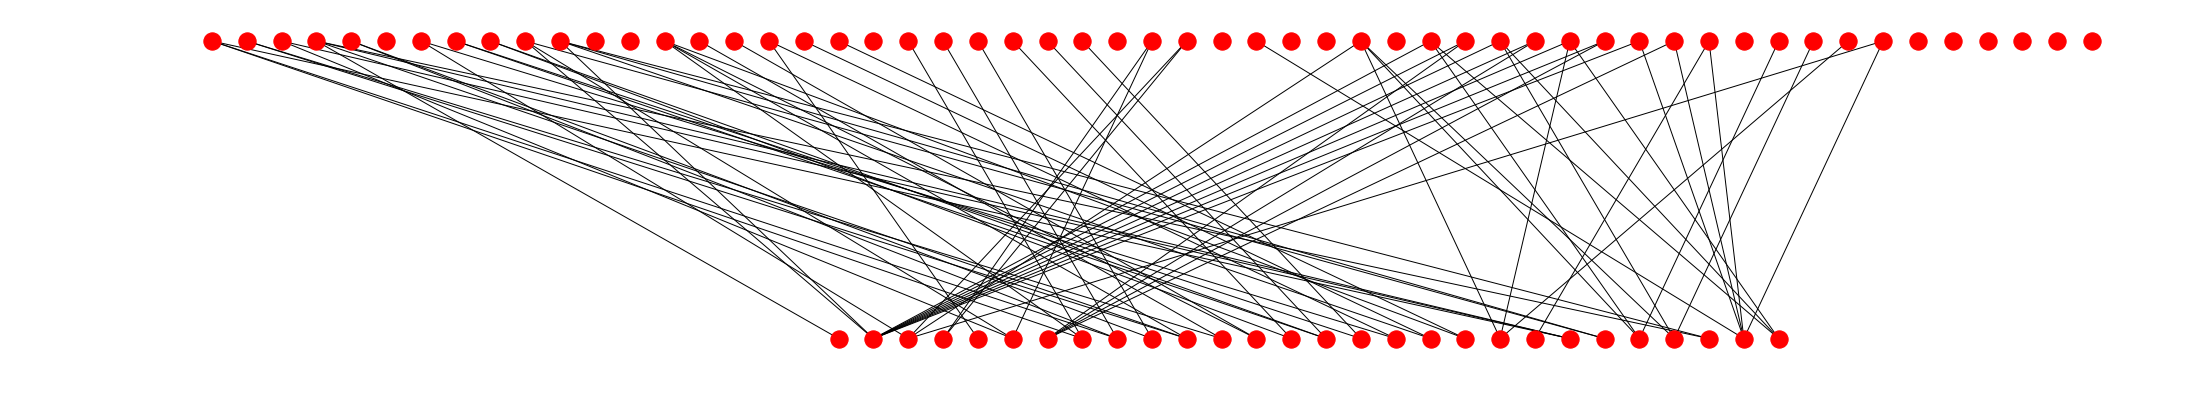

In [6]:
fig = plt.figure(figsize=(30,5))
pos = dict()
pos.update( (n, (-10*i, 1)) for i, n in enumerate(tokens) ) # put nodes from X at x=1
pos.update( (n, (90-10*i, 2)) for i, n in enumerate(range(lines_num + 1)) ) # put nodes from Y at x=2
nx.draw(B, pos=pos, label=True)
plt.show()

To be continued...))